In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from util import HISTORICAL_RULES_FILE , RESOURCE_DIR, IMAGES_DIR
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
projectsWithBD = 234

In [2]:
#pd.__version__
#pip uninstall pandas

This script analyse this association rules find in the first version

In [3]:
df = pd.read_excel(RESOURCE_DIR + os.sep + 'historical_rulesv1.xlsx', keep_default_na=False) #'seq_patterns/testes/historical_rules_commit1_197reg_021.xlsx'
#df = pd.read_excel(HISTORICAL_RULES_FILE , keep_default_na=False)
#df2 = df.copy()
len(df)
#df.head()
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,frozenset({'MS SQL Server'}),frozenset({'IBM DB2'}),0.038793,0.043103,0.021552,0.555556,12.888889,0.019880,2.153017,1,1
1,frozenset({'IBM DB2'}),frozenset({'MS SQL Server'}),0.043103,0.038793,0.021552,0.500000,12.888889,0.019880,1.922414,1,1
2,frozenset({'MS SQL Server'}),frozenset({'SQLite'}),0.038793,0.051724,0.021552,0.555556,10.740741,0.019545,2.133621,1,1
3,frozenset({'SQLite'}),frozenset({'MS SQL Server'}),0.051724,0.038793,0.021552,0.416667,10.740741,0.019545,1.647783,1,1
4,frozenset({'IBM DB2'}),frozenset({'Oracle'}),0.043103,0.086207,0.038793,0.900000,10.440000,0.035077,9.137931,1,1
...,...,...,...,...,...,...,...,...,...,...,...
61,frozenset({'H2'}),frozenset({'MySQL'}),0.116379,0.232759,0.073276,0.629630,2.705075,0.046188,2.071552,1,1
62,frozenset({'MySQL'}),frozenset({'HyperSQL'}),0.232759,0.137931,0.086207,0.370370,2.685185,0.054102,1.369168,1,1
63,frozenset({'HyperSQL'}),frozenset({'MySQL'}),0.137931,0.232759,0.086207,0.625000,2.685185,0.054102,2.045977,1,1
64,frozenset({'MySQL'}),frozenset({'SQLite'}),0.232759,0.051724,0.030172,0.129630,2.506173,0.018133,1.089508,1,1


In [4]:
#convert em string
df['antecedents'] = df['antecedents'].astype(str)
df['consequents'] = df['consequents'].astype(str)

In [5]:
#Extract the word "frozenset" of the dataframe
df['antecedents'] = df['antecedents'].apply(lambda x: x[len('frozenset({"'):-3])
df['consequents'] = df['consequents'].apply(lambda x: x[len('frozenset({"'):-3])
df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,0.043103,0.021552,0.555556,12.888889,0.019880,2.153017,1,1
1,IBM DB2,MS SQL Server,0.043103,0.038793,0.021552,0.500000,12.888889,0.019880,1.922414,1,1
2,MS SQL Server,SQLite,0.038793,0.051724,0.021552,0.555556,10.740741,0.019545,2.133621,1,1
3,SQLite,MS SQL Server,0.051724,0.038793,0.021552,0.416667,10.740741,0.019545,1.647783,1,1
4,IBM DB2,Oracle,0.043103,0.086207,0.038793,0.900000,10.440000,0.035077,9.137931,1,1
...,...,...,...,...,...,...,...,...,...,...,...
61,H2,MySQL,0.116379,0.232759,0.073276,0.629630,2.705075,0.046188,2.071552,1,1
62,MySQL,HyperSQL,0.232759,0.137931,0.086207,0.370370,2.685185,0.054102,1.369168,1,1
63,HyperSQL,MySQL,0.137931,0.232759,0.086207,0.625000,2.685185,0.054102,2.045977,1,1
64,MySQL,SQLite,0.232759,0.051724,0.030172,0.129630,2.506173,0.018133,1.089508,1,1


In [6]:
#Create a new columns
df.insert(3,'antecedent_sup_abs', 0, True)
df.insert(5,'consequent_sup_abs', 0, True)
df.insert(7,'support_abs', 0, True)

#Converting the support relative values in absolut values
df['antecedent_sup_abs'] = (df['antecedent support']*projectsWithBD)
df['consequent_sup_abs'] = (df['consequent support']*projectsWithBD)
df['support_abs'] = (df['support']*projectsWithBD)
df

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1,1
1,IBM DB2,MS SQL Server,0.043103,10.086207,0.038793,9.077586,0.021552,5.043103,0.500000,12.888889,0.019880,1.922414,1,1
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
4,IBM DB2,Oracle,0.043103,10.086207,0.086207,20.172414,0.038793,9.077586,0.900000,10.440000,0.035077,9.137931,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,H2,MySQL,0.116379,27.232759,0.232759,54.465517,0.073276,17.146552,0.629630,2.705075,0.046188,2.071552,1,1
62,MySQL,HyperSQL,0.232759,54.465517,0.137931,32.275862,0.086207,20.172414,0.370370,2.685185,0.054102,1.369168,1,1
63,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20.172414,0.625000,2.685185,0.054102,2.045977,1,1
64,MySQL,SQLite,0.232759,54.465517,0.051724,12.103448,0.030172,7.060345,0.129630,2.506173,0.018133,1.089508,1,1


In [7]:
df2 = df.copy()
df2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1,1
1,IBM DB2,MS SQL Server,0.043103,10.086207,0.038793,9.077586,0.021552,5.043103,0.500000,12.888889,0.019880,1.922414,1,1
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
4,IBM DB2,Oracle,0.043103,10.086207,0.086207,20.172414,0.038793,9.077586,0.900000,10.440000,0.035077,9.137931,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,H2,MySQL,0.116379,27.232759,0.232759,54.465517,0.073276,17.146552,0.629630,2.705075,0.046188,2.071552,1,1
62,MySQL,HyperSQL,0.232759,54.465517,0.137931,32.275862,0.086207,20.172414,0.370370,2.685185,0.054102,1.369168,1,1
63,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20.172414,0.625000,2.685185,0.054102,2.045977,1,1
64,MySQL,SQLite,0.232759,54.465517,0.051724,12.103448,0.030172,7.060345,0.129630,2.506173,0.018133,1.089508,1,1


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [8]:
rules1b = df2.sort_values(['support'], ascending=[False])
rules1b

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
49,MySQL,PostgreSQL,0.232759,54.465517,0.099138,23.198276,0.090517,21.181034,0.388889,3.922705,0.067442,1.474138,1,1
48,PostgreSQL,MySQL,0.099138,23.198276,0.232759,54.465517,0.090517,21.181034,0.913043,3.922705,0.067442,8.823276,1,1
63,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20.172414,0.625000,2.685185,0.054102,2.045977,1,1
62,MySQL,HyperSQL,0.232759,54.465517,0.137931,32.275862,0.086207,20.172414,0.370370,2.685185,0.054102,1.369168,1,1
60,MySQL,H2,0.232759,54.465517,0.116379,27.232759,0.073276,17.146552,0.314815,2.705075,0.046188,1.289609,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,PostgreSQL,Informix,0.099138,23.198276,0.021552,5.043103,0.021552,5.043103,0.217391,10.086957,0.019415,1.250239,1,1
6,Informix,PostgreSQL,0.021552,5.043103,0.099138,23.198276,0.021552,5.043103,1.000000,10.086957,0.019415,inf,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1


In [9]:
#Definindo um limite como 0.07, você está focando em regras onde o antecedente ocorre em pelo menos 7% das transações, o que pode ajudar a analisar padrões mais frequentes.
rules1a = df2[(df2['antecedent support'] >= 0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1a = rules1a.groupby('antecedents').mean().sort_values(['antecedent support',], ascending=[False])
rules1a

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.232759,54.465517,0.075431,17.650862,0.057112,13.364224,0.245370,3.491281,0.039555,1.241221,1.0,1.0
HyperSQL,0.137931,32.275862,0.079981,18.715517,0.043582,10.198276,0.315972,4.851133,0.032551,1.401600,1.0,1.0
H2,0.116379,27.232759,0.098522,23.054187,0.040025,9.365764,0.343915,4.019612,0.028559,1.434713,1.0,1.0
PostgreSQL,0.099138,23.198276,0.084291,19.724138,0.043103,10.086207,0.434783,6.502744,0.034747,2.362754,1.0,1.0
Oracle,0.086207,20.172414,0.093750,21.937500,0.042026,9.834052,0.487500,6.762503,0.033944,1.955195,1.0,1.0


Top 10 BDs Session
Presentation of the 10 most frequent BDs (consequents=antecedents).

In [10]:
#Focando em regras onde o consequente aparece em pelo menos 13% das transações, o que permite analisar regras com consequentes relativamente frequentes.
rules1 = df2[(df2['consequent support'] >= 0.13)] #0.07)] #& (df['confidence'] > 0.7) ]
#rules2 = rules2.sort_values(['consequent support','support'], ascending=[False,False])
rules1 = rules1.groupby('consequents').mean().sort_values(['consequent support',], ascending=[False])
rules1

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.075431,17.650862,0.232759,54.465517,0.057112,13.364224,0.812626,3.491281,0.039555,NaN,1.0,1.0
HyperSQL,0.079981,18.715517,0.137931,32.275862,0.043582,10.198276,0.669122,4.851133,0.032551,NaN,1.0,1.0


In [11]:
rules1c = df2.groupby(['antecedents','consequents']).mean().sort_values(['support',], ascending=[False])

#sum().plot(kind='line')

#rules1c = rules1c[(rules1c['support'] >= 0.03)] 
rules1c

antecedent support  antecedent_sup_abs  \
antecedents   consequents                                           
PostgreSQL    MySQL                  0.099138           23.198276   
MySQL         PostgreSQL             0.232759           54.465517   
HyperSQL      MySQL                  0.137931           32.275862   
MySQL         HyperSQL               0.232759           54.465517   
              H2                     0.232759           54.465517   
...                                       ...                 ...   
MS Access     HyperSQL               0.030172            7.060345   
              PostgreSQL             0.030172            7.060345   
MS SQL Server SQLite                 0.038793            9.077586   
H2            IBM DB2                0.116379           27.232759   
IBM DB2       H2                     0.043103           10.086207   

                           consequent support  consequent_sup_abs   support  \
antecedents   consequents                                                     
PostgreSQL    MySQL                  0.232759           54.465517  0.090517   
MySQL         PostgreSQL             0.099138           23.198276  0.090517   
HyperSQL      MySQL                  0.232759           54.465517  0.086207   
MySQL         HyperSQL               0.137931           32.275862  0.086207   
              H2                     0.116379           27.232759  0.073276   
...                                       ...                 ...       ...   
MS Access     HyperSQL               0.137931           32.275862  0.021552   
              PostgreSQL             0.099138           23.198276  0.021552   
MS SQL Server SQLite                 0.051724           12.103448  0.021552   
H2            IBM DB2                0.043103           10.086207  0.021552   
IBM DB2       H2                     0.116379           27.232759  0.021552   

                           support_abs  confidence       lift  leverage  \
antecedents   consequents                                                 
PostgreSQL    MySQL          21.181034    0.913043   3.922705  0.067442   
MySQL         PostgreSQL     21.181034    0.388889   3.922705  0.067442   
HyperSQL      MySQL          20.172414    0.625000   2.685185  0.054102   
MySQL         HyperSQL       20.172414    0.370370   2.685185  0.054102   
              H2             17.146552    0.314815   2.705075  0.046188   
...                                ...         ...        ...       ...   
MS Access     HyperSQL        5.043103    0.714286   5.178571  0.017390   
              PostgreSQL      5.043103    0.714286   7.204969  0.018560   
MS SQL Server SQLite          5.043103    0.555556  10.740741  0.019545   
H2            IBM DB2         5.043103    0.185185   4.296296  0.016535   
IBM DB2       H2              5.043103    0.500000   4.296296  0.016535   

                           conviction  antecedent_len  consequente_len  
antecedents   consequents                                               
PostgreSQL    MySQL          8.823276             1.0              1.0  
MySQL         PostgreSQL     1.474138             1.0              1.0  
HyperSQL      MySQL          2.045977             1.0              1.0  
MySQL         HyperSQL       1.369168             1.0              1.0  
              H2             1.289609             1.0              1.0  
...                               ...             ...              ...  
MS Access     HyperSQL       3.017241             1.0              1.0  
              PostgreSQL     3.153017             1.0              1.0  
MS SQL Server SQLite         2.133621             1.0              1.0  
H2            IBM DB2        1.174373             1.0              1.0  
IBM DB2       H2             1.767241             1.0              1.0  

[66 rows x 12 columns]

In [12]:
#if you need to generate the rules in excel
#rules_filter = rules1c.to_excel('rules_filtersv1.xlsx', index=False)

In [13]:
# In this section we eliminate the inverted rules (regras espelhadas AB - BA)
#Always run this before reset.index()
new_index = []

for index in rules1c.index:
    if index[::-1] in new_index:
        continue
    new_index.append(index)


len(new_index), len(rules1c.index)
rules1c = rules1c.loc[new_index,:]
rules1c

antecedent support  antecedent_sup_abs  \
antecedents   consequents                                             
PostgreSQL    MySQL                    0.099138           23.198276   
HyperSQL      MySQL                    0.137931           32.275862   
MySQL         H2                       0.232759           54.465517   
              Oracle                   0.232759           54.465517   
Oracle        HyperSQL                 0.086207           20.172414   
              PostgreSQL               0.086207           20.172414   
HyperSQL      PostgreSQL               0.137931           32.275862   
H2            HyperSQL                 0.116379           27.232759   
IBM DB2       MySQL                    0.043103           10.086207   
H2            PostgreSQL               0.116379           27.232759   
IBM DB2       HyperSQL                 0.043103           10.086207   
Oracle        IBM DB2                  0.086207           20.172414   
MySQL         MS SQL Server            0.232759           54.465517   
Oracle        H2                       0.086207           20.172414   
PostgreSQL    MS SQL Server            0.099138           23.198276   
              IBM DB2                  0.099138           23.198276   
SQLite        PostgreSQL               0.051724           12.103448   
              H2                       0.051724           12.103448   
HyperSQL      MS SQL Server            0.137931           32.275862   
Oracle        SQLite                   0.086207           20.172414   
              MS SQL Server            0.086207           20.172414   
MySQL         SQLite                   0.232759           54.465517   
MS Access     MySQL                    0.030172            7.060345   
SQLite        HyperSQL                 0.051724           12.103448   
MS Access     Oracle                   0.030172            7.060345   
H2            MS SQL Server            0.116379           27.232759   
PostgreSQL    MS Access                0.099138           23.198276   
SQLite        MS SQL Server            0.051724           12.103448   
MS SQL Server IBM DB2                  0.038793            9.077586   
PostgreSQL    Informix                 0.099138           23.198276   
HyperSQL      Informix                 0.137931           32.275862   
              MS Access                0.137931           32.275862   
H2            IBM DB2                  0.116379           27.232759   

                             consequent support  consequent_sup_abs   support  \
antecedents   consequents                                                       
PostgreSQL    MySQL                    0.232759           54.465517  0.090517   
HyperSQL      MySQL                    0.232759           54.465517  0.086207   
MySQL         H2                       0.116379           27.232759  0.073276   
              Oracle                   0.086207           20.172414  0.064655   
Oracle        HyperSQL                 0.137931           32.275862  0.056034   
              PostgreSQL               0.099138           23.198276  0.056034   
HyperSQL      PostgreSQL               0.099138           23.198276  0.056034   
H2            HyperSQL                 0.137931           32.275862  0.051724   
IBM DB2       MySQL                    0.232759           54.465517  0.043103   
H2            PostgreSQL               0.099138           23.198276  0.043103   
IBM DB2       HyperSQL                 0.137931           32.275862  0.043103   
Oracle        IBM DB2                  0.043103           10.086207  0.038793   
MySQL         MS SQL Server            0.038793            9.077586  0.038793   
Oracle        H2                       0.116379           27.232759  0.034483   
PostgreSQL    MS SQL Server            0.038793            9.077586  0.034483   
              IBM DB2                  0.043103           10.086207  0.034483   
SQLite        PostgreSQL               0.099138           23.198276  0.030172   
    

In [14]:
rules1c = rules1c.reset_index()
rules1c

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,MySQL,0.099138,23.198276,0.232759,54.465517,0.090517,21.181034,0.913043,3.922705,0.067442,8.823276,1.0,1.0
1,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20.172414,0.625000,2.685185,0.054102,2.045977,1.0,1.0
2,MySQL,H2,0.232759,54.465517,0.116379,27.232759,0.073276,17.146552,0.314815,2.705075,0.046188,1.289609,1.0,1.0
3,MySQL,Oracle,0.232759,54.465517,0.086207,20.172414,0.064655,15.129310,0.277778,3.222222,0.044590,1.265252,1.0,1.0
4,Oracle,HyperSQL,0.086207,20.172414,0.137931,32.275862,0.056034,13.112069,0.650000,4.712500,0.044144,2.463054,1.0,1.0
5,Oracle,PostgreSQL,0.086207,20.172414,0.099138,23.198276,0.056034,13.112069,0.650000,6.556522,0.047488,2.573892,1.0,1.0
6,HyperSQL,PostgreSQL,0.137931,32.275862,0.099138,23.198276,0.056034,13.112069,0.406250,4.097826,0.042360,1.517241,1.0,1.0
7,H2,HyperSQL,0.116379,27.232759,0.137931,32.275862,0.051724,12.103448,0.444444,3.222222,0.035672,1.551724,1.0,1.0
8,IBM DB2,MySQL,0.043103,10.086207,0.232759,54.465517,0.043103,10.086207,1.000000,4.296296,0.033071,inf,1.0,1.0
9,H2,PostgreSQL,0.116379,27.232759,0.099138,23.198276,0.043103,10.086207,0.370370,3.735910,0.031566,1.430781,1.0,1.0


In [15]:
#if you need to generate the rules in excel
#rules1c.to_excel('coocurrence_filters_v1.xlsx', index=False)

Furthermore, we found that projects tend to use MySQL, PostgreSQL, Oracle, H2, SQLite, IBM DB2, Ehcache, MS SQL Server, MongoDB, Sap Adaptive Server, and MS Access DBMS together at the beginning of the life cycle. From the middle of the life cycle to the current project cycle there is a variation in the joint usage, moving to use the DBMS Maria DB and Redis and moving away from using the Sap Adaptive Server and MS Access DBMS.
Another relevant aspect is the existence of exchanges of DBMS during the history of the projects.

In [16]:
#rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support','consequent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['consequents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
consequents,,,,,,,,,,,,
MySQL,0.077586,18.155172,0.232759,54.465517,0.062500,14.625000,0.884511,3.800121,0.044441,NaN,1.0,1.0
PostgreSQL,0.098060,22.946121,0.099138,23.198276,0.046336,10.842672,0.502488,5.068579,0.036615,1.920996,1.0,1.0
H2,0.123563,28.913793,0.116379,27.232759,0.045977,10.758621,0.432716,3.718153,0.031597,1.627666,1.0,1.0
Oracle,0.131466,30.762931,0.086207,20.172414,0.045259,10.590517,0.567460,6.582540,0.033925,3.830902,1.0,1.0
HyperSQL,0.074353,17.398707,0.137931,32.275862,0.044181,10.338362,0.648611,4.702431,0.033925,NaN,1.0,1.0
MS SQL Server,0.120690,28.241379,0.038793,9.077586,0.030172,7.060345,0.287022,7.398788,0.025490,1.370007,1.0,1.0
SQLite,0.159483,37.318966,0.051724,12.103448,0.030172,7.060345,0.239815,4.636420,0.021923,1.274197,1.0,1.0
IBM DB2,0.085129,19.920259,0.043103,10.086207,0.029095,6.808190,0.384642,8.923688,0.025425,1.633611,1.0,1.0
Informix,0.118534,27.737069,0.021552,5.043103,0.021552,5.043103,0.186821,8.668478,0.018997,1.204941,1.0,1.0


In [17]:
#rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support','antecedent_sup_abs',], ascending=[False,False])
rules1ca = rules1c.groupby(['antecedents']).mean().sort_values(['support'], ascending=[False])
rules1ca

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.232759,54.465517,0.073276,17.146552,0.051724,12.103448,0.222222,3.182442,0.034669,1.199454,1.0,1.0
HyperSQL,0.137931,32.275862,0.084483,19.768966,0.043103,10.086207,0.312500,4.970094,0.031451,1.420526,1.0,1.0
IBM DB2,0.043103,10.086207,0.185345,43.370690,0.043103,10.086207,1.000000,5.773148,0.035114,NaN,1.0,1.0
Oracle,0.086207,20.172414,0.081178,18.995690,0.040948,9.581897,0.475000,6.822491,0.033950,1.864521,1.0,1.0
PostgreSQL,0.099138,23.198276,0.073276,17.146552,0.040517,9.481034,0.408696,7.650076,0.033253,2.850766,1.0,1.0
H2,0.116379,27.232759,0.079741,18.659483,0.035560,8.321121,0.305556,4.245706,0.026280,1.348179,1.0,1.0
MS Access,0.030172,7.060345,0.159483,37.318966,0.028017,6.556034,0.928571,7.119577,0.023205,NaN,1.0,1.0
SQLite,0.051724,12.103448,0.098060,22.946121,0.026940,6.303879,0.520833,6.315536,0.021868,1.913670,1.0,1.0
MS SQL Server,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1.0,1.0


In the first version only 11 BDs appear as used together

In [18]:
rules1cb = rules1ca[(rules1ca['support'] >= 0.02)] 
rules1cb 
#if you need to generate the rules in excel

,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
antecedents,,,,,,,,,,,,
MySQL,0.232759,54.465517,0.073276,17.146552,0.051724,12.103448,0.222222,3.182442,0.034669,1.199454,1.0,1.0
HyperSQL,0.137931,32.275862,0.084483,19.768966,0.043103,10.086207,0.312500,4.970094,0.031451,1.420526,1.0,1.0
IBM DB2,0.043103,10.086207,0.185345,43.370690,0.043103,10.086207,1.000000,5.773148,0.035114,NaN,1.0,1.0
Oracle,0.086207,20.172414,0.081178,18.995690,0.040948,9.581897,0.475000,6.822491,0.033950,1.864521,1.0,1.0
PostgreSQL,0.099138,23.198276,0.073276,17.146552,0.040517,9.481034,0.408696,7.650076,0.033253,2.850766,1.0,1.0
H2,0.116379,27.232759,0.079741,18.659483,0.035560,8.321121,0.305556,4.245706,0.026280,1.348179,1.0,1.0
MS Access,0.030172,7.060345,0.159483,37.318966,0.028017,6.556034,0.928571,7.119577,0.023205,NaN,1.0,1.0
SQLite,0.051724,12.103448,0.098060,22.946121,0.026940,6.303879,0.520833,6.315536,0.021868,1.913670,1.0,1.0
MS SQL Server,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1.0,1.0


This chart shows all the rules for the BDs used together in first version.

In [19]:
#Graph generated with all the rules without the support filter
import plotly.express as px 
#data = rules1c.sort_values(['support_abs'], ascending=[False])
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#df = px.data.gapminder('support_abs')
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
size = "support_abs", color="support_abs", title='Correlation of the most frequent databases in first version',
hover_data=['support_abs'],color_continuous_scale = ["silver","gray"],height=500, text='support_abs')
#fig.add_annotation(text= 'hover_data')
                  #xref="antecedent_support", yref="consequent_support",
                 #x=0.3, y=0.3, showarrow=False)
#fig.update_traces(textposition='inside')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [20]:
#Test showing the rules without repetitions and without function ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
rules1c['support_abs'] = rules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(rules1c.sort_values(['support_abs'], ascending=[False]), x="consequents", y="antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"], text='support_abs')
#fig.title('Correlation of the most frequent databases')
fig.show()

In [21]:
#In this section the dataframe is ordered
orules1c = rules1c.sort_values(['support_abs'], ascending=[False])

order = {}
current = 1
for index, row in orules1c.iterrows():
    if row['antecedents'] not in order:
        order[row['antecedents']] = current
        current += 1
for index, row in orules1c.iterrows():
    if row['consequents'] not in order:
        order[row['consequents']] = current
        current += 1
#function ordering
def order_fn(x):
    if x.name == 'support_abs':
        return x
    return x.apply(lambda element: order[element])

orules1c = orules1c.sort_values(by=['antecedents', 'consequents', 'support_abs'], key=order_fn)

orules1c['consequents'] = pd.Categorical(orules1c['consequents'], order.keys())
orules1c['antecedents'] = pd.Categorical(orules1c['antecedents'], order.keys())
orules1c = orules1c.rename(columns={"consequents": "Consequents", "antecedents": "Antecedents"})
orules1c
#order

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,MySQL,0.099138,23.198276,0.232759,54.465517,0.090517,21,0.913043,3.922705,0.067442,8.823276,1.0,1.0
15,PostgreSQL,IBM DB2,0.099138,23.198276,0.043103,10.086207,0.034483,8,0.347826,8.069565,0.030210,1.467241,1.0,1.0
26,PostgreSQL,MS Access,0.099138,23.198276,0.030172,7.060345,0.021552,5,0.217391,7.204969,0.018560,1.239224,1.0,1.0
14,PostgreSQL,MS SQL Server,0.099138,23.198276,0.038793,9.077586,0.034483,8,0.347826,8.966184,0.030637,1.473851,1.0,1.0
29,PostgreSQL,Informix,0.099138,23.198276,0.021552,5.043103,0.021552,5,0.217391,10.086957,0.019415,1.250239,1.0,1.0
6,HyperSQL,PostgreSQL,0.137931,32.275862,0.099138,23.198276,0.056034,13,0.406250,4.097826,0.042360,1.517241,1.0,1.0
1,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20,0.625000,2.685185,0.054102,2.045977,1.0,1.0
31,HyperSQL,MS Access,0.137931,32.275862,0.030172,7.060345,0.021552,5,0.156250,5.178571,0.017390,1.149425,1.0,1.0
18,HyperSQL,MS SQL Server,0.137931,32.275862,0.038793,9.077586,0.030172,7,0.218750,5.638889,0.024822,1.230345,1.0,1.0
30,HyperSQL,Informix,0.137931,32.275862,0.021552,5.043103,0.021552,5,0.156250,7.250000,0.018579,1.159642,1.0,1.0


In [22]:
#if you need to generate the rules in excel
rules_filterv1 = orules1c.to_excel('rules_filtersv1_order.xlsx', index=False)

In [23]:
rules15 = df2[(df2['lift'] >= 1)] #& (df2['confidence'] > 0.5)] #>20(['support_abs'], ascending=[False])
rules15 = rules15.sort_values(['lift'], ascending=False)

pd.set_option('display.max_rows', None)     # Exibe todas as linhas
pd.set_option('display.max_columns', None) 

display(rules15)

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1,1
1,IBM DB2,MS SQL Server,0.043103,10.086207,0.038793,9.077586,0.021552,5.043103,0.500000,12.888889,0.019880,1.922414,1,1
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
4,IBM DB2,Oracle,0.043103,10.086207,0.086207,20.172414,0.038793,9.077586,0.900000,10.440000,0.035077,9.137931,1,1
5,Oracle,IBM DB2,0.086207,20.172414,0.043103,10.086207,0.038793,9.077586,0.450000,10.440000,0.035077,1.739812,1,1
6,Informix,PostgreSQL,0.021552,5.043103,0.099138,23.198276,0.021552,5.043103,1.000000,10.086957,0.019415,inf,1,1
7,PostgreSQL,Informix,0.099138,23.198276,0.021552,5.043103,0.021552,5.043103,0.217391,10.086957,0.019415,1.250239,1,1
9,MS Access,Oracle,0.030172,7.060345,0.086207,20.172414,0.025862,6.051724,0.857143,9.942857,0.023261,6.396552,1,1
8,Oracle,MS Access,0.086207,20.172414,0.030172,7.060345,0.025862,6.051724,0.300000,9.942857,0.023261,1.385468,1,1


In [24]:
rulesTeste = df[ (df['consequents'] .str.contains('Cassandra')) & (df['confidence'] > 0.5) ]
rulesTeste

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Test generating the sorted heatmap after the ordering function

In [25]:
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot2 = orules1c.pivot(index='Consequents', columns='Antecedents', values='support_abs')
pivot_filled = pivot.combine_first(pivot2)

pivot_filled



,PostgreSQL,HyperSQL,MySQL,Oracle,H2,IBM DB2,MS Access,SQLite,MS SQL Server,Informix
PostgreSQL,NaN,13.0,21.0,13.0,10.0,8.0,5.0,7.0,8.0,5.0
HyperSQL,13.0,NaN,20.0,13.0,12.0,10.0,5.0,6.0,7.0,5.0
MySQL,21.0,20.0,NaN,15.0,17.0,10.0,7.0,7.0,9.0,NaN
Oracle,13.0,13.0,15.0,NaN,8.0,9.0,6.0,7.0,7.0,NaN
H2,10.0,12.0,17.0,8.0,NaN,5.0,NaN,7.0,6.0,NaN
IBM DB2,8.0,10.0,10.0,9.0,5.0,NaN,NaN,NaN,5.0,NaN
MS Access,5.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
SQLite,7.0,6.0,7.0,7.0,7.0,NaN,NaN,NaN,5.0,NaN
MS SQL Server,8.0,7.0,9.0,7.0,6.0,5.0,NaN,5.0,NaN,NaN
Informix,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


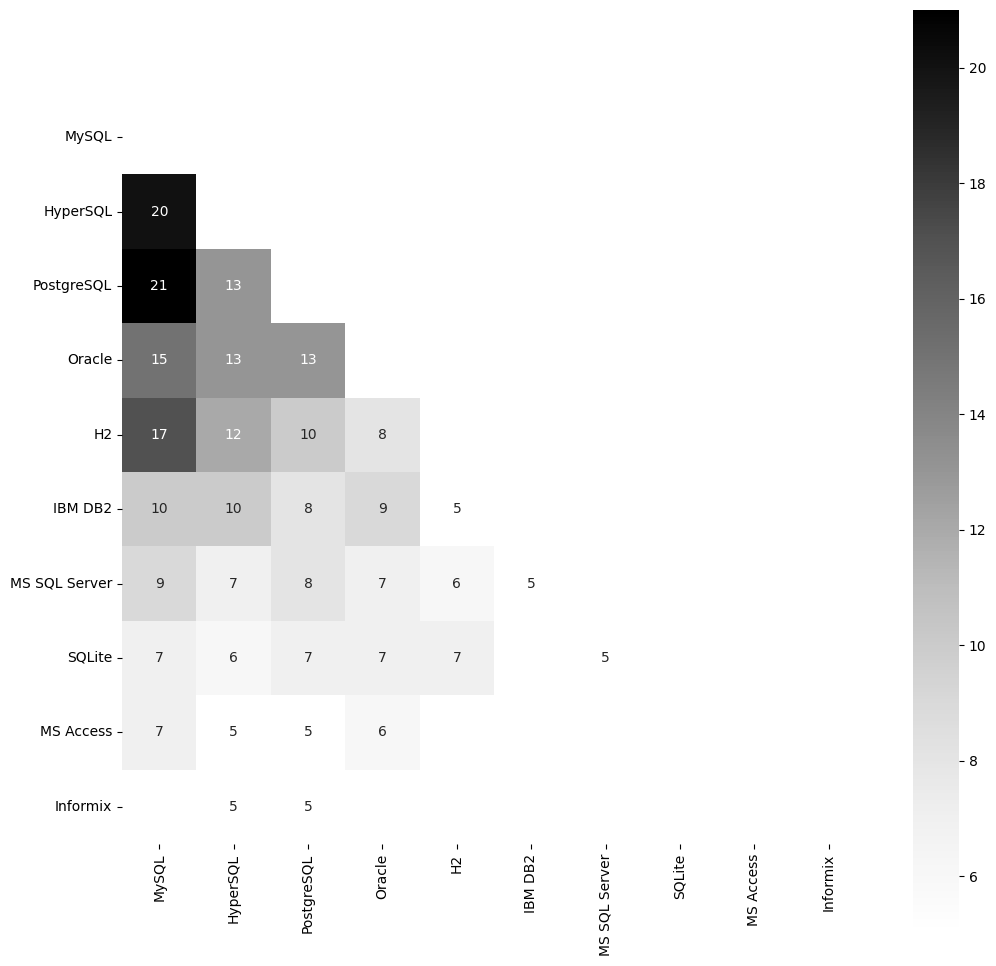

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ordena as linhas (Antecedents) para que as maiores somas venham primeiro
ordered_rows = pivot_filled.sum(axis=1).sort_values(ascending=False).index  # Ordena as linhas

# Ordena as colunas (Consequents) para que as maiores somas venham primeiro
ordered_cols = pivot_filled.sum(axis=0).sort_values(ascending=False).index  # Ordena as colunas

# Reordena a tabela pivotada tanto pelas linhas quanto pelas colunas
pivot_ordered = pivot_filled.loc[ordered_rows, ordered_cols]

# Cria a máscara para o triângulo superior na matriz reordenada
mask_lower = np.triu(np.ones(pivot_ordered.shape), k=0)

# Configura o heatmap com a tabela reordenada
sns.heatmap(
    pivot_ordered, 
    mask=mask_lower, 
    xticklabels=True, 
    yticklabels=True, 
    annot=True, 
    cmap=sns.color_palette("Greys", as_cmap=True), 
    square=True
)

# Adiciona legendas para os eixos X e Y
#plt.xlabel("Consequents")
#plt.ylabel("Antecedents")

# Ajusta o tamanho da figura
fig = plt.gcf()
fig.set_size_inches(12, 12)

# Salva o gráfico em um arquivo PDF
plt.savefig(IMAGES_DIR + "/heat_onlyrules_v1.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [27]:
#Calcular o total de BDs
num_unicos = orules1c['Antecedents'].nunique()
#print(num_unicos)

colunas_unicas = orules1c['Consequents'].nunique()
#print(colunas_unicas)

intersecao = set(orules1c['Antecedents']).intersection(orules1c['Consequents'])
tam_intersecao = len(intersecao)
#print(tam_intersecao)

dif1 = num_unicos - tam_intersecao
dif2 = colunas_unicas - tam_intersecao
Total = dif1 + dif2 + tam_intersecao

print(Total)

10


In [28]:
#Test showing the rules without repetitions and with dataframe ordering.
import plotly.express as px 
#rules1cd = rules1c[(rules1c['support'] >= 0.04) & (rules1c['support_abs'] != 0)] 
orules1c['support_abs'] = orules1c['support_abs'].astype(int)
#fig = px.scatter(rules1c.groupby(['antecedent_sup_abs','consequent_sup_abs']).mean().sort_values(['support_abs',], ascending=[False]),
#.sort_values(['support_abs'], ascending=[False])
fig = px.scatter(orules1c.sort_values(['support_abs'], ascending=[False]), x="Consequents", y="Antecedents", 
#x="consequents", y="antecedents", 
size='support_abs',  color="support_abs", title='Correlation of the most frequent databases in the first version',
hover_data=['support_abs'], color_continuous_scale = ["silver","gray"],text='support_abs') 
#fig.title('Correlation of the most frequent databases')
fig.show()

In [29]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,MySQL,0.099138,23.198276,0.232759,54.465517,0.090517,21,0.913043,3.922705,0.067442,8.823276,1.0,1.0
1,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20,0.625000,2.685185,0.054102,2.045977,1.0,1.0
2,MySQL,H2,0.232759,54.465517,0.116379,27.232759,0.073276,17,0.314815,2.705075,0.046188,1.289609,1.0,1.0
3,MySQL,Oracle,0.232759,54.465517,0.086207,20.172414,0.064655,15,0.277778,3.222222,0.044590,1.265252,1.0,1.0
5,Oracle,PostgreSQL,0.086207,20.172414,0.099138,23.198276,0.056034,13,0.650000,6.556522,0.047488,2.573892,1.0,1.0
6,HyperSQL,PostgreSQL,0.137931,32.275862,0.099138,23.198276,0.056034,13,0.406250,4.097826,0.042360,1.517241,1.0,1.0
4,Oracle,HyperSQL,0.086207,20.172414,0.137931,32.275862,0.056034,13,0.650000,4.712500,0.044144,2.463054,1.0,1.0
7,H2,HyperSQL,0.116379,27.232759,0.137931,32.275862,0.051724,12,0.444444,3.222222,0.035672,1.551724,1.0,1.0
8,IBM DB2,MySQL,0.043103,10.086207,0.232759,54.465517,0.043103,10,1.000000,4.296296,0.033071,inf,1.0,1.0
10,IBM DB2,HyperSQL,0.043103,10.086207,0.137931,32.275862,0.043103,10,1.000000,7.250000,0.037158,inf,1.0,1.0


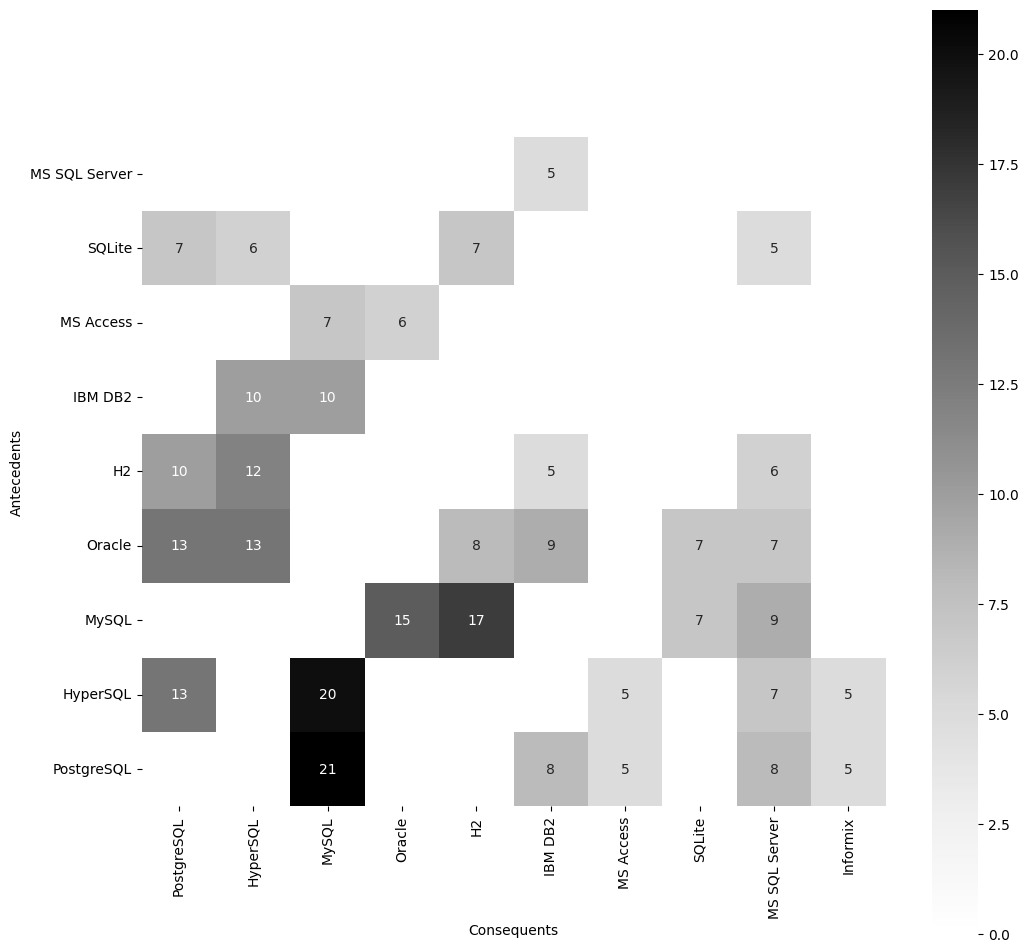

In [30]:
# Heatmap graph generated with all rules and dataframe ordering
# The suggestion for this chart would be to show all rules without filtering by support
import seaborn as sns
pivot = orules1c.pivot(index='Antecedents', columns='Consequents', values='support_abs')
pivot = pivot.iloc[::-1]
sns.heatmap(pivot, xticklabels=True, yticklabels=True,  vmin=0,  cmap=sns.color_palette("Greys", as_cmap=True), annot=True, square=True)
fig = plt.gcf()
fig.set_size_inches(12, 12)

In [31]:
#Test by ordering only through support, after dataframe ordering
orules1cd = orules1c.sort_values(by=['support_abs'], ascending=False)
orules1cd

,Antecedents,Consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,PostgreSQL,MySQL,0.099138,23.198276,0.232759,54.465517,0.090517,21,0.913043,3.922705,0.067442,8.823276,1.0,1.0
1,HyperSQL,MySQL,0.137931,32.275862,0.232759,54.465517,0.086207,20,0.625000,2.685185,0.054102,2.045977,1.0,1.0
2,MySQL,H2,0.232759,54.465517,0.116379,27.232759,0.073276,17,0.314815,2.705075,0.046188,1.289609,1.0,1.0
3,MySQL,Oracle,0.232759,54.465517,0.086207,20.172414,0.064655,15,0.277778,3.222222,0.044590,1.265252,1.0,1.0
5,Oracle,PostgreSQL,0.086207,20.172414,0.099138,23.198276,0.056034,13,0.650000,6.556522,0.047488,2.573892,1.0,1.0
6,HyperSQL,PostgreSQL,0.137931,32.275862,0.099138,23.198276,0.056034,13,0.406250,4.097826,0.042360,1.517241,1.0,1.0
4,Oracle,HyperSQL,0.086207,20.172414,0.137931,32.275862,0.056034,13,0.650000,4.712500,0.044144,2.463054,1.0,1.0
7,H2,HyperSQL,0.116379,27.232759,0.137931,32.275862,0.051724,12,0.444444,3.222222,0.035672,1.551724,1.0,1.0
8,IBM DB2,MySQL,0.043103,10.086207,0.232759,54.465517,0.043103,10,1.000000,4.296296,0.033071,inf,1.0,1.0
10,IBM DB2,HyperSQL,0.043103,10.086207,0.137931,32.275862,0.043103,10,1.000000,7.250000,0.037158,inf,1.0,1.0


PostgreSQL and MySQL being used concurrently in 27 projects, Oracle with PostgreSQL appears in 17 projects, H2 with Oracle in 12 projects, SQLite with H2 in 6 projects, Ehcache with MySQL in 10 projects, Sap Adaptive Server with IBM DB2 in 5 projects, MS SQL Server with SQlite in 5 projects, MongoDB with MySQL in 6 projects, among other combinations.

In the rules below, we list the 10 most frequent BDs as consequents and confidence > 70%, confidence only in the case of relational ones. 
Add rules where they appear as antecedents.

In [32]:
rules2 = df[ (df['consequents'].str.contains('MySQL')) &(df['confidence'] > 0.7)]
rules2

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
38,MS SQL Server,MySQL,0.038793,9.077586,0.232759,54.465517,0.038793,9.077586,1.000000,4.296296,0.029764,inf,1,1
40,IBM DB2,MySQL,0.043103,10.086207,0.232759,54.465517,0.043103,10.086207,1.000000,4.296296,0.033071,inf,1,1
42,MS Access,MySQL,0.030172,7.060345,0.232759,54.465517,0.030172,7.060345,1.000000,4.296296,0.023150,inf,1,1
48,PostgreSQL,MySQL,0.099138,23.198276,0.232759,54.465517,0.090517,21.181034,0.913043,3.922705,0.067442,8.823276,1,1
58,Oracle,MySQL,0.086207,20.172414,0.232759,54.465517,0.064655,15.129310,0.750000,3.222222,0.044590,3.068966,1,1


In [33]:
rules3 = df[(df['consequents'].str.contains('PostgreSQL')) | (df['antecedents'].str.contains('PostgreSQL'))] #(df['confidence'] > 0.7) ]
rules3

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
6,Informix,PostgreSQL,0.021552,5.043103,0.099138,23.198276,0.021552,5.043103,1.000000,10.086957,0.019415,inf,1,1
7,PostgreSQL,Informix,0.099138,23.198276,0.021552,5.043103,0.021552,5.043103,0.217391,10.086957,0.019415,1.250239,1,1
12,PostgreSQL,MS SQL Server,0.099138,23.198276,0.038793,9.077586,0.034483,8.068966,0.347826,8.966184,0.030637,1.473851,1,1
13,MS SQL Server,PostgreSQL,0.038793,9.077586,0.099138,23.198276,0.034483,8.068966,0.888889,8.966184,0.030637,8.107759,1,1
14,PostgreSQL,IBM DB2,0.099138,23.198276,0.043103,10.086207,0.034483,8.068966,0.347826,8.069565,0.030210,1.467241,1,1
15,IBM DB2,PostgreSQL,0.043103,10.086207,0.099138,23.198276,0.034483,8.068966,0.800000,8.069565,0.030210,4.504310,1,1
20,MS Access,PostgreSQL,0.030172,7.060345,0.099138,23.198276,0.021552,5.043103,0.714286,7.204969,0.018560,3.153017,1,1
21,PostgreSQL,MS Access,0.099138,23.198276,0.030172,7.060345,0.021552,5.043103,0.217391,7.204969,0.018560,1.239224,1,1
24,Oracle,PostgreSQL,0.086207,20.172414,0.099138,23.198276,0.056034,13.112069,0.650000,6.556522,0.047488,2.573892,1,1
25,PostgreSQL,Oracle,0.099138,23.198276,0.086207,20.172414,0.056034,13.112069,0.565217,6.556522,0.047488,2.101724,1,1


In [34]:
rules4 = df[(df['consequents'].str.contains('H2')) & (df['confidence'] > 0.7) ]
rules4

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [35]:
rules5 = df[(df['consequents'].str.contains('Oracle')) & (df['confidence'] > 0.7) ]
rules5

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
4,IBM DB2,Oracle,0.043103,10.086207,0.086207,20.172414,0.038793,9.077586,0.900000,10.440000,0.035077,9.137931,1,1
9,MS Access,Oracle,0.030172,7.060345,0.086207,20.172414,0.025862,6.051724,0.857143,9.942857,0.023261,6.396552,1,1
11,MS SQL Server,Oracle,0.038793,9.077586,0.086207,20.172414,0.030172,7.060345,0.777778,9.022222,0.026828,4.112069,1,1


In [36]:
rules6 = df[ (df['consequents'].str.contains('SQLite'))]# & (df['confidence'] > 0.3) ] # 0.7
rules6

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1
23,Oracle,SQLite,0.086207,20.172414,0.051724,12.103448,0.030172,7.060345,0.350000,6.766667,0.025713,1.458886,1,1
27,PostgreSQL,SQLite,0.099138,23.198276,0.051724,12.103448,0.030172,7.060345,0.304348,5.884058,0.025045,1.363147,1,1
34,H2,SQLite,0.116379,27.232759,0.051724,12.103448,0.030172,7.060345,0.259259,5.012346,0.024153,1.280172,1,1
52,HyperSQL,SQLite,0.137931,32.275862,0.051724,12.103448,0.025862,6.051724,0.187500,3.625000,0.018728,1.167109,1,1
64,MySQL,SQLite,0.232759,54.465517,0.051724,12.103448,0.030172,7.060345,0.129630,2.506173,0.018133,1.089508,1,1


In [37]:
rules7 = df[(df['consequents'].str.contains('Ehcache'))]# & (df['confidence'] > 0.7) ]
rules7

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [38]:
#rules7 = df[ (df['consequents'].str.contains('Redis'))] #& (df['confidence'] > 0.7) ]
rules8 = df[ (df['consequents'].str.contains('IBM DB2'))] #& (df['confidence'] > 0.7) ]
rules8

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1,1
5,Oracle,IBM DB2,0.086207,20.172414,0.043103,10.086207,0.038793,9.077586,0.450000,10.440000,0.035077,1.739812,1,1
14,PostgreSQL,IBM DB2,0.099138,23.198276,0.043103,10.086207,0.034483,8.068966,0.347826,8.069565,0.030210,1.467241,1,1
19,HyperSQL,IBM DB2,0.137931,32.275862,0.043103,10.086207,0.043103,10.086207,0.312500,7.250000,0.037158,1.391850,1,1
41,MySQL,IBM DB2,0.232759,54.465517,0.043103,10.086207,0.043103,10.086207,0.185185,4.296296,0.033071,1.174373,1,1
45,H2,IBM DB2,0.116379,27.232759,0.043103,10.086207,0.021552,5.043103,0.185185,4.296296,0.016535,1.174373,1,1


In [39]:
#rules9 = df[(df['consequents'].str.contains('MongoDB'))]#& (df['confidence'] > 0.3) ] # 0.7
rules9 = df[ (df['consequents'].str.contains('MS SQL Server'))]# & (df['confidence'] > 0.7) ]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
1,IBM DB2,MS SQL Server,0.043103,10.086207,0.038793,9.077586,0.021552,5.043103,0.500000,12.888889,0.019880,1.922414,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
10,Oracle,MS SQL Server,0.086207,20.172414,0.038793,9.077586,0.030172,7.060345,0.350000,9.022222,0.026828,1.478780,1,1
12,PostgreSQL,MS SQL Server,0.099138,23.198276,0.038793,9.077586,0.034483,8.068966,0.347826,8.966184,0.030637,1.473851,1,1
28,H2,MS SQL Server,0.116379,27.232759,0.038793,9.077586,0.025862,6.051724,0.222222,5.728395,0.021347,1.235837,1,1
31,HyperSQL,MS SQL Server,0.137931,32.275862,0.038793,9.077586,0.030172,7.060345,0.218750,5.638889,0.024822,1.230345,1,1
39,MySQL,MS SQL Server,0.232759,54.465517,0.038793,9.077586,0.038793,9.077586,0.166667,4.296296,0.029764,1.153448,1,1


In [40]:
rules10 = df[ (df['antecedents'].str.contains('SAP Adaptive Server')) | (df['consequents'].str.contains('SAP Adaptive Server'))]# & (df['confidence'] > 0.7) ]
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [41]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules11 = df[ (df['consequents'] .str.contains('MS Access'))]# & (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
8,Oracle,MS Access,0.086207,20.172414,0.030172,7.060345,0.025862,6.051724,0.300000,9.942857,0.023261,1.385468,1,1
21,PostgreSQL,MS Access,0.099138,23.198276,0.030172,7.060345,0.021552,5.043103,0.217391,7.204969,0.018560,1.239224,1,1
33,HyperSQL,MS Access,0.137931,32.275862,0.030172,7.060345,0.021552,5.043103,0.156250,5.178571,0.017390,1.149425,1,1
43,MySQL,MS Access,0.232759,54.465517,0.030172,7.060345,0.030172,7.060345,0.129630,4.296296,0.023150,1.114270,1,1


In [42]:
#rules11 = df[ (df['consequents'] .str.contains('MariaDB'))]# & (df['confidence'] > 0.7) ]
rules12 = df[ (df['consequents'] .str.contains('MongoDB'))]# & (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Expected Patterns Session
In the rules below, we highlight the dependence presented in opposite directions and the expected correlation.
In first version not occurr expected patterns

In [43]:
rules9 = df[((df['antecedents'].str.contains('MariaDB')) & (df['consequents'].str.contains('MySQL'))) | 
((df['antecedents'].str.contains('MySQL')) & (df['consequents'].str.contains('MariaDB')))]
rules9

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [44]:
rules10 = df2[((df2['antecedents'].str.contains('PostgreSQL')) & (df2['consequents'].str.contains('PostGIS'))) | 
((df2['antecedents'].str.contains('PostGIS')) & (df2['consequents'].str.contains('PostgreSQL')))]
#rules10 = df2[(df2['consequents'].str.contains('PostGIS'))] Este BD nã retornou nas regras
rules10

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [45]:
rules11 = df[ (df['consequents'] .str.contains('MySQL')) & (df['antecedents'] .str.contains('MariaDB'))|
             (df['antecedents'] .str.contains('MySQL')) & (df['consequents'] .str.contains('MariaDB'))] #& (df['confidence'] > 0.7) ]
rules11

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


In [46]:
rules12 = df[ (df['consequents'] .str.contains('PostgreSQL')) & (df['antecedents'] .str.contains('PostGIS'))|
             (df['antecedents'] .str.contains('PostgreSQL')) & (df['consequents'] .str.contains('PostGIS'))] #& (df['confidence'] > 0.7) ]
rules12

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len


Unexpected Patterns Session
In the rules below we highlight competition and high lift values.

In [47]:
#Top 10 rules with highest lifts in the First Slice of the project life cycle
rules13 = df2[(df2['lift'] > 4.5)] #>20
rules13 = rules13.sort_values(['lift'], ascending=False)
rules13

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1,1
1,IBM DB2,MS SQL Server,0.043103,10.086207,0.038793,9.077586,0.021552,5.043103,0.500000,12.888889,0.019880,1.922414,1,1
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
4,IBM DB2,Oracle,0.043103,10.086207,0.086207,20.172414,0.038793,9.077586,0.900000,10.440000,0.035077,9.137931,1,1
5,Oracle,IBM DB2,0.086207,20.172414,0.043103,10.086207,0.038793,9.077586,0.450000,10.440000,0.035077,1.739812,1,1
6,Informix,PostgreSQL,0.021552,5.043103,0.099138,23.198276,0.021552,5.043103,1.000000,10.086957,0.019415,inf,1,1
7,PostgreSQL,Informix,0.099138,23.198276,0.021552,5.043103,0.021552,5.043103,0.217391,10.086957,0.019415,1.250239,1,1
9,MS Access,Oracle,0.030172,7.060345,0.086207,20.172414,0.025862,6.051724,0.857143,9.942857,0.023261,6.396552,1,1
8,Oracle,MS Access,0.086207,20.172414,0.030172,7.060345,0.025862,6.051724,0.300000,9.942857,0.023261,1.385468,1,1


In [48]:
#rules13_filter = rules13.to_excel('rules_filters_liftv1.xlsx', index=False)

In [49]:
rules14 = df2[(df2['confidence'] > 0.1)] #>20(['support_abs'], ascending=[False])
rules14 = rules14.sort_values(['lift'], ascending=False)
rules14

,antecedents,consequents,antecedent support,antecedent_sup_abs,consequent support,consequent_sup_abs,support,support_abs,confidence,lift,leverage,conviction,antecedent_len,consequente_len
0,MS SQL Server,IBM DB2,0.038793,9.077586,0.043103,10.086207,0.021552,5.043103,0.555556,12.888889,0.019880,2.153017,1,1
1,IBM DB2,MS SQL Server,0.043103,10.086207,0.038793,9.077586,0.021552,5.043103,0.500000,12.888889,0.019880,1.922414,1,1
2,MS SQL Server,SQLite,0.038793,9.077586,0.051724,12.103448,0.021552,5.043103,0.555556,10.740741,0.019545,2.133621,1,1
3,SQLite,MS SQL Server,0.051724,12.103448,0.038793,9.077586,0.021552,5.043103,0.416667,10.740741,0.019545,1.647783,1,1
4,IBM DB2,Oracle,0.043103,10.086207,0.086207,20.172414,0.038793,9.077586,0.900000,10.440000,0.035077,9.137931,1,1
5,Oracle,IBM DB2,0.086207,20.172414,0.043103,10.086207,0.038793,9.077586,0.450000,10.440000,0.035077,1.739812,1,1
6,Informix,PostgreSQL,0.021552,5.043103,0.099138,23.198276,0.021552,5.043103,1.000000,10.086957,0.019415,inf,1,1
7,PostgreSQL,Informix,0.099138,23.198276,0.021552,5.043103,0.021552,5.043103,0.217391,10.086957,0.019415,1.250239,1,1
9,MS Access,Oracle,0.030172,7.060345,0.086207,20.172414,0.025862,6.051724,0.857143,9.942857,0.023261,6.396552,1,1
8,Oracle,MS Access,0.086207,20.172414,0.030172,7.060345,0.025862,6.051724,0.300000,9.942857,0.023261,1.385468,1,1


In [50]:
#if you need to generate the rules in excel
rules_filter = df2.to_excel('historical_filters.xlsx', index=False)